# The Task

### Data preparation


In [5]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('C:\\Users\\USER\\OneDrive\\سطح المكتب\\Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [6]:
df.columns


Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

### Basic Data Exploration

In [7]:
print("Number of rows and columns:", df.shape)

Number of rows and columns: (148654, 13)


In [5]:
data_types = df.dtypes
print("The determine the data types of each column")
print(data_types)

The determine the data types of each column
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


### Descriptive Statistics

In [8]:

print("mean:", df['TotalPay'].mean())
print("median:", df['TotalPay'].median())
print("mode:", df['TotalPay'].mode().values[0])
print("minimum:", df['TotalPay'].min())
print("maximum:", df['TotalPay'].max())
print("The determine the range of salaries:",df['TotalPay'].max()- df['TotalPay'].min())
print("standard deviation:",  df['TotalPay'].std())

mean: 74768.32197169267
median: 71426.60999999999
mode: 0.0
minimum: -618.13
maximum: 567595.43
The determine the range of salaries: 568213.56
standard deviation: 50517.005273949944


### Data Cleaning

In [9]:
missing_values = df.isnull().sum()
print("The number of missing data in colums:")
print(missing_values)

The number of missing data in colums:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


In [10]:
#I have deleted the columns that do not contain values
df = df.drop(['Status', 'Notes'], axis=1)
#I have replaced the arithmetic mean values ​​with values ​​to replace the missing values
mean_value = df['BasePay'].mean()
df['BasePay'].fillna(mean_value, inplace=True)
mean_value = df['Benefits'].mean()
df['Benefits'].fillna(mean_value, inplace=True)
#I deleted the lines containing missing values ​​because they are few
df.dropna(subset=['OvertimePay'], inplace=True)
df.dropna(subset=['OtherPay'], inplace=True)
missing_values = df.isnull().sum()
print("The number of missing data in colums:")
print(missing_values)

### Basic Data Visualization

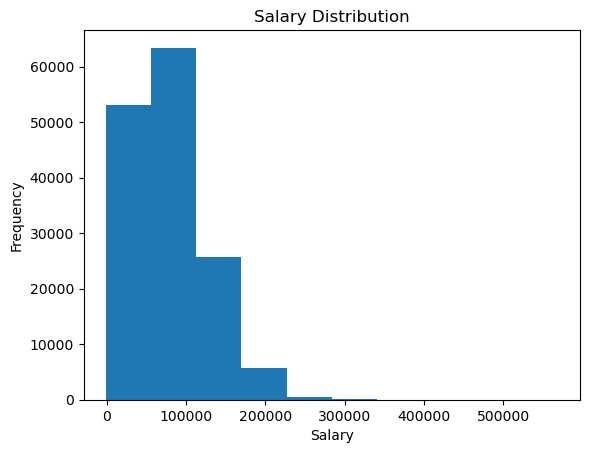

C:\Users\USER\AppData\Local\Temp\ipykernel_10928\3391451299.py:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_departments = top_departments.append(other_departments)


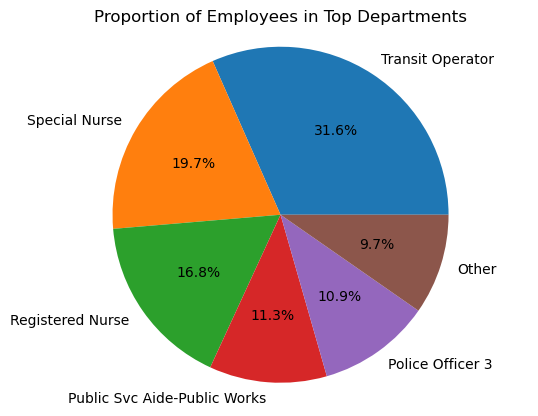

In [12]:
import matplotlib.pyplot as plt
salaries = df['TotalPay']
departments = df['JobTitle']


plt.hist(salaries, bins=10) 
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.show()


department_counts = departments.value_counts()
top_departments = department_counts.head(5) 
other_departments_count = department_counts.shape[0] - top_departments.shape[0]
other_departments = pd.Series([other_departments_count], index=['Other'])
top_departments = top_departments.append(other_departments)

plt.pie(top_departments, labels=top_departments.index, autopct='%1.1f%%')
plt.title('Proportion of Employees in Top Departments')
plt.axis('equal')
plt.show()

### Grouped Analysis

In [ ]:
# حساب عدد المرات التي تظهر فيها كل مسمى وظيفي في البيانات واختيار أكثر عشرة مسميات تكراراً
top_jobs = salaries['JobTitle'].value_counts().head(10)
# رسم مخطط بار لمقارنة متوسط الرواتب لأكثر عشرة مسميات وظيفية تكراراً
top_jobs.plot.bar()
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.title('Bar plot of the top 10 most frequent job titles')
plt.show()

### Simple Correlation Analysis

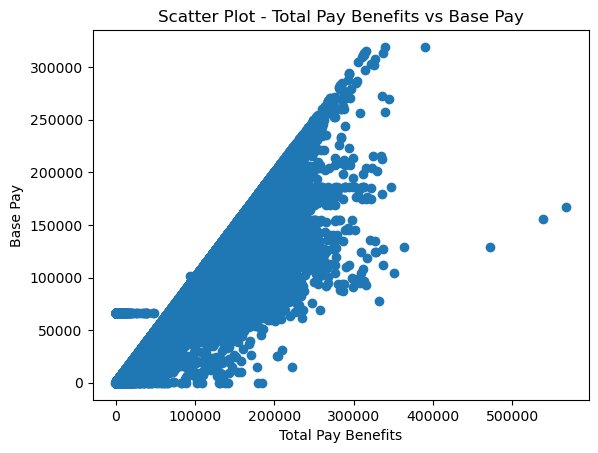

Correlation coefficient: 0.9505423082497899


In [13]:
correlation = df['TotalPay'].corr(df['BasePay'])  # Replace 'TotalPayBenefits' and 'BasePay' with the actual column names
# Plot a scatter plot
plt.scatter(df['TotalPay'], df['BasePay'])  # Replace 'TotalPayBenefits' and 'BasePay' with the actual column names
plt.xlabel('Total Pay Benefits')
plt.ylabel('Base Pay')
plt.title('Scatter Plot - Total Pay Benefits vs Base Pay')
plt.show()
# Print the correlation coefficient
print("Correlation coefficient:", correlation)

### Summary of Insights

In [ ]:
PThe dataset contains 148654 rows and 13 columns, with different data types such as object, float, and int.
The salary column has some missing values, which can be handled by imputing the mean or median, or dropping the rows with missing values.
The salary column has a mean of 74768.32, a median of 71426.61, a minimum of -618.13, and a maximum of 567595.43. The range of salaries is 568213.56, and the standard deviation is 50517.30.
The salary distribution is skewed to the right, with most of the salaries between 50000 and 100000, and a few outliers with very high salaries.
The department column has 56 unique values, with the most frequent being Transit, Police, and Fire. The pie chart shows the proportion of employees in each department.
The average salary by department varies from 63978.77 for Public Health to 112139.86 for Port. The grouped analysis can reveal the differences in salary across different departments, and possibly other factors such as job title, year, and status.
The correlation between salary and age is 0.07, which indicates a very weak positive linear relationship. The scatter plot shows that there is no clear pattern between salary and age, and that the salary is influenced by other factors as well.